In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import importlib
from graphviz import Digraph, Source
from pygraphviz import AGraph
import numpy as np
import matplotlib.image as mpimg
from IPython.display import Image
import matplotlib.pyplot as plt
from flow import Node, CreditFlow, Graph, get_source_nodes, topo_sort, flatten_graph, eval_graph, boundary_graph, single_source_graph, viz_graph, save_graph
import copy
from flow import ParallelCreditFlow

In [3]:
def build_random_graph(n_nodes=10):
    nodes = []
    name = 'a'
    for _ in range(n_nodes):
        args = [nodes[i] for i in range(0 if len(nodes) == 0 else np.random.choice(len(nodes)))]
        node = Node(name, lambda *args: (sum(args) >= len(args)).astype(int), args) # and function
        # node = Node(name, lambda *args: int(sum(args) >= 1), args) # or function
        name = chr(ord(name) + 1)
        nodes.append(node)

    print(len(nodes), "nodes")
    source_nodes = get_source_nodes(nodes)
    n_relevant_features = np.random.choice(range(1, len(nodes)))
    feature_mask = np.random.choice(range(1, len(nodes)), n_relevant_features, replace=False)
    args = nodes
    target_node = Node('Y', lambda *args: sum([arg for i, arg in enumerate(args) if i in feature_mask]), 
                       args, is_target_node=True)
    nodes.append(target_node)
    
    graph = Graph(nodes,
                  dict((node.name, lambda: 0) for node in source_nodes),
                  dict((node.name, lambda: 1) for node in source_nodes),
                  )
    return graph

graph = build_random_graph()

10 nodes


sampling: 100%|██████████| 100/100 [00:00<00:00, 533.44it/s]


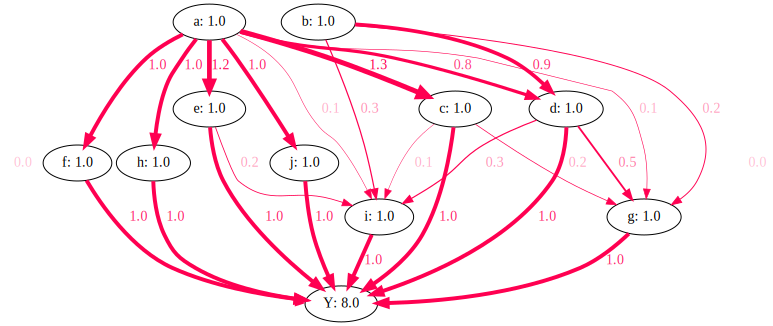

In [4]:
verbose = False
cf = CreditFlow(graph, verbose=verbose, nruns=100, visualize=verbose)
cf.run()

G = cf.credit2dot(format_str="{:.1f}")
viz_graph(G)

sampling: 100%|██████████| 100/100 [00:00<00:00, 1010.53it/s]


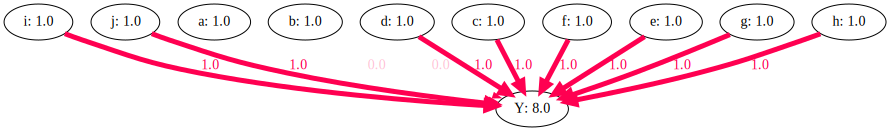

In [5]:
shap_graph = flatten_graph(graph)
verbose = False
cf = CreditFlow(shap_graph, verbose=verbose, nruns=100, visualize=verbose)
cf.run()

G = cf.credit2dot(format_str="{:.1f}")
viz_graph(G)

sampling: 100%|██████████| 100/100 [00:00<00:00, 438.46it/s]


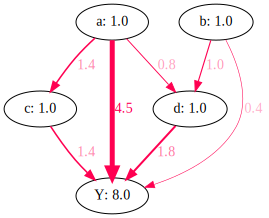

In [6]:
bgraph = boundary_graph(graph, ['a', 'b', 'c', 'd'])
verbose = False
cf = CreditFlow(bgraph, verbose=verbose, nruns=100, visualize=verbose)
cf.run()

G = cf.credit2dot(format_str="{:.1f}")
viz_graph(G)

Above we show explanation of a random system.

The first is Shapley flow, the second is Shap, and the third is some arbitrary boundary.

sampling: 100%|██████████| 100/100 [00:00<00:00, 638.37it/s]


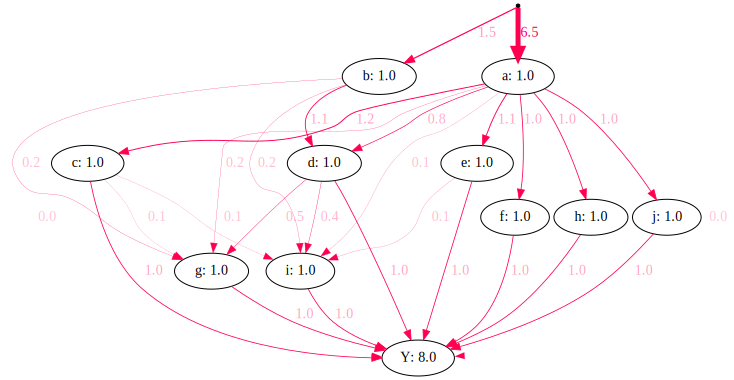

In [7]:
sgraph = single_source_graph(graph)
verbose = False
cf = CreditFlow(sgraph, verbose=verbose, nruns=100, visualize=verbose)
cf.run()

G = cf.credit2dot(format_str="{:.1f}")
viz_graph(G)

# Intervention simulation

In [8]:
sources = get_source_nodes(graph)
d = dict((node.name, 0) for node in sources)
d.update({'d': 1})
print('output:', eval_graph(graph, d))

output: [1]


# Parallel runs

In [9]:
nruns = 3000

In [10]:
cf = CreditFlow(graph, nruns=nruns)
%time cf.run()

sampling: 100%|██████████| 3000/3000 [00:04<00:00, 609.82it/s]

CPU times: user 5.02 s, sys: 851 ms, total: 5.87 s
Wall time: 4.92 s


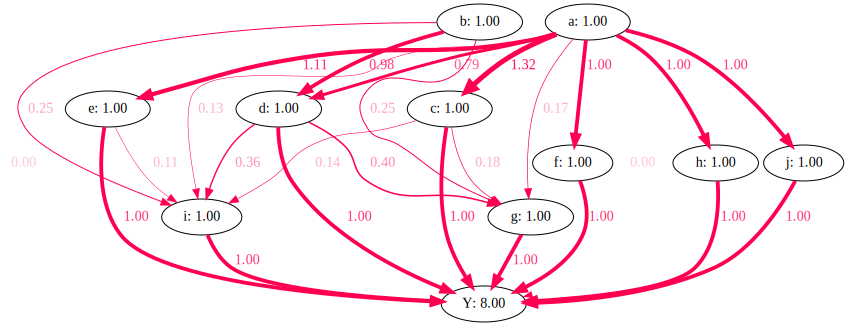

In [11]:
cf.draw()

In [13]:
cf = ParallelCreditFlow(graph, nruns=3000, njobs=8)
%time cf.run2()

3000 runs with 8 njobs


sampling: 100%|██████████| 375/375 [00:01<00:00, 242.61it/s]


CPU times: user 103 ms, sys: 111 ms, total: 214 ms
Wall time: 1.61 s


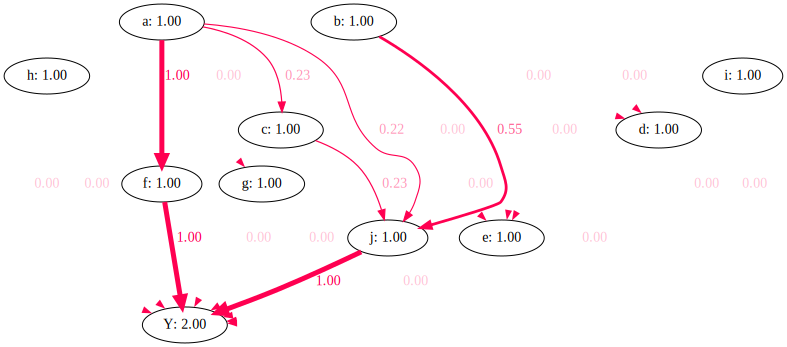

In [12]:
cf.draw()

In [28]:
cf = ParallelCreditFlow(graph, nruns=1, njobs=1)
%time cf.run()

1 runs with 1 njobs
CPU times: user 11.1 ms, sys: 4.19 ms, total: 15.3 ms
Wall time: 2.01 s


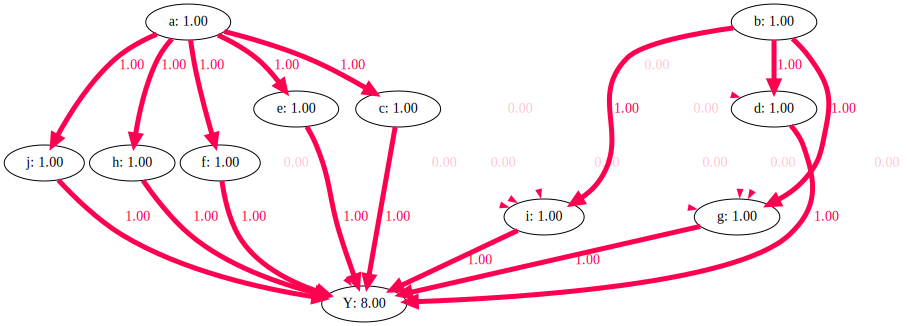

In [29]:
cf.draw()